---
---

# Milestone 1

Nama    = Gerald Imanuel Sinay

Batch   = HCK 033

`Project ini bertujuan untuk melakukan data cleaning lalu melakukan analisa terhadap masalah yang ada serta melakukan visualisasi terhadap data dan analisis tersebut, agar hasil analisis tersebut dapat digunakan untuk menyusun strategi selanjutnya`
---
---

### Problem Statement
Supermarket menghadapi tantangan untuk meningkatkan **jumlah pelanggan dan profitabilitas penjualan** di berbagai cabang. 
Manajemen kesulitan mengidentifikasi faktor-faktor utama yang memengaruhi **pendapatan, margin keuntungan, dan kepuasan pelanggan**.

### SMART
- Specific      = Meningkatkan pendapatan total dan rating pelanggan melalui optimasi produk, promosi, dan pelayanan di tiap cabang.
- Measureable   = KPI: perubahan total sales, rata-rata rating per cabang, gross margin. Target: +10% revenue & rating ≥(8.0).
- Achieveable   = Dilakukan dengan promosi produk unggulan, training staf, dan pengelolaan jam sibuk (peak hours). 
- Relevant      = Meningkatkan pendapatan dan rating mendukung pertumbuhan jangka panjang supermarket.
- Time-bound    = Target dicapai dalam 2 kuartal (6 bulan). Evaluasi bulanan untuk memantau progres.

#### Pada analisis terdapat 6 pertanyaan utama
1. Berapa total sales per branch?
2. Berapa rata-rata rating tiap product line nya?
3. Bagaimana hubungan antara total transaksi dengan ratingnya?
4. Bagaimana metode pembayaran per tipe pelanggan?
5. Bagaimana rata-rata dari total, rating, serta gross income nya?
6. Apakah rata-rata total berbeda signifikan antara dua cabang (mis. A vs B).

#### Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Agar grafik lebih rapi
plt.style.use('seaborn-v0_8')
sns.set_palette("muted")

# Ganti sesuai nama file asli dari Kaggle
file_path = "P0M1_Gerald_dataset.csv"

df = pd.read_csv(file_path)
print("Jumlah baris & kolom:", df.shape)
df.head()

Jumlah baris & kolom: (1000, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


### Kesimpulan
1. Tidak ditemukan nilai null/missing pada awal data.
2. Ada beberapa data set yang harus diubah tipe data nya, contohnya tanggal

#### Data Cleaning

### Apa saja yang kita lakukan diproses data cleaning?
1. Kita lakukan standarisasi untuk nama-nama kolomnya
2. Hapus data yang memiliki nilai duplikat
3. Cek dan atasi missing values
4. Konversi kolom-kolom numerik yang tipe data nya belum sesuai
5. Konversi tipe data tanggal dari object ke date
6. Validasi harga dan kuantitasnya
7. Buang outlier dan save hasil cleaning ke csv

In [6]:
# Untuk standarisasi nama kolom nya
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

In [7]:
# Untuk menghapus data yang duplikat
df = df.drop_duplicates()

In [8]:
# Untuk menangani missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].median())

In [9]:
# Untuk menstandarisasi kolom kategorinya
text_cols = ['branch', 'city', 'customer_type', 'gender', 'product_line', 'payment']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

In [36]:
# Konversi kolom numerik yang salah tipe
num_cols = ['unit_price', 'quantity', 'tax_5%', 'total', 
            'cogs', 'gross_margin_percentage', 'gross_income', 'rating']

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [17]:
# Ubah tipe data untuk tanggal nya dari object ke date
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['day_of_week'] = df['date'].dt.day_name()
try:
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
except:
    df['time'] = pd.to_datetime(df['time'], errors='coerce').dt.time

df['hour'] = df['time'].apply(lambda x: x.hour if pd.notna(x) else np.nan)

In [18]:
# Untuk validasi harga dan kuantitasnya
df = df[(df['unit_price'] > 0) & (df['quantity'] > 0)]

# Hitung ulang total & margin
df['expected_total'] = df['unit_price'] * df['quantity'] * 1.05  # asumsi 5% tax
if 'total' not in df.columns:
    df['total'] = df['expected_total'].round(2)

if 'gross_income' not in df.columns:
    df['gross_income'] = df['total'] * 0.05  # asumsi margin 5%

df['gross_margin_percentage'] = (df['gross_income'] / df['total']) * 100

In [19]:
# Buang Outlier
upper = df['total'].quantile(0.999)
df = df[(df['total'] > 0) & (df['total'] <= upper)]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               998 non-null    object        
 1   branch                   998 non-null    object        
 2   city                     998 non-null    object        
 3   customer_type            998 non-null    object        
 4   gender                   998 non-null    object        
 5   product_line             998 non-null    object        
 6   unit_price               998 non-null    float64       
 7   quantity                 998 non-null    int64         
 8   tax_5%                   998 non-null    float64       
 9   total                    998 non-null    float64       
 10  date                     998 non-null    datetime64[ns]
 11  time                     998 non-null    object        
 12  payment                  998 non-null    

In [35]:
# Simpan hasil data cleaning ke file csv
df.to_csv("P0M1_Gerald_dataset_cleaned.csv", index=False)
print("Data cleaning selesai. File disimpan sebagai 'P0M1_Gerald_dataset_cleaned.csv'.")
print("Jumlah baris setelah cleaning:", df.shape[0])

Data cleaning selesai. File disimpan sebagai 'P0M1_Gerald_dataset_cleaned.csv'.
Jumlah baris setelah cleaning: 1000


# Analisis

In [ ]:
# Hanya menampilkan kolom numerik
df.describe().T

,count,mean,min,25%,50%,75%,max,std
unit_price,998.0,55.58502,10.08,32.825,55.055,77.71,99.96,26.449491
quantity,998.0,5.501002,1.0,3.0,5.0,8.0,10.0,2.919429
tax_5%,998.0,15.310851,0.5085,5.864625,12.076,22.428,49.26,11.619891
total,998.0,321.527865,10.6785,123.157125,253.596,470.988,1034.46,244.017711
date,998,2019-02-14 00:12:59.158316544,2019-01-01 00:00:00,2019-01-24 00:00:00,2019-02-13 00:00:00,2019-03-08 00:00:00,2019-03-30 00:00:00,NaN
cogs,998.0,306.217014,10.17,117.2925,241.52,448.56,985.2,232.39782
gross_margin_percentage,998.0,4.761905,4.761905,4.761905,4.761905,4.761905,4.761905,0.0
gross_income,998.0,15.310851,0.5085,5.864625,12.076,22.428,49.26,11.619891
rating,998.0,6.971343,4.0,5.5,7.0,8.5,10.0,1.719392
hour,998.0,14.90982,10.0,12.0,15.0,18.0,20.0,3.189735


In [ ]:
# Hanya menampilkan kolom kategorikal
df.describe(include=['object']).T   

,count,unique,top,freq
invoice_id,998,998,849-09-3807,1
branch,998,3,A,339
city,998,3,Yangon,339
customer_type,998,2,Member,500
gender,998,2,Female,500
product_line,998,6,Fashion Accessories,176
time,998,505,14:42:00,7
payment,998,3,Ewallet,345
day_of_week,998,7,Saturday,164


### 1. Berapa total sales per branch?

### Insight
Identifikasi cabang dengan kontribusi pendapatan terbesar dan cabang yang perlu difokuskan untuk kenaikan revenue.

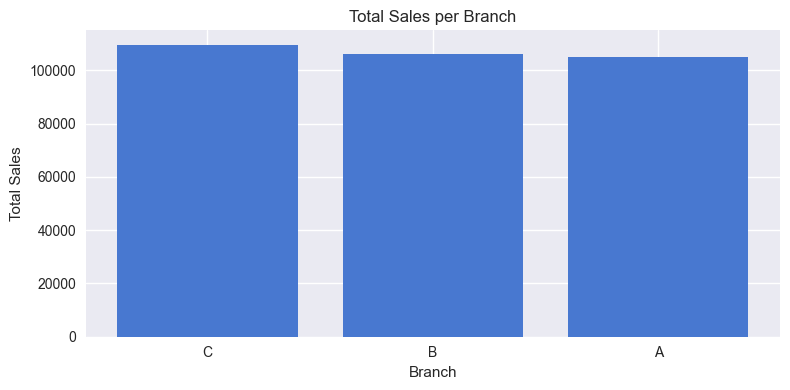

In [26]:
# Visualisasi 1: Total Sales per Branch (matplotlib)
group = df.groupby('branch')['total'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
plt.bar(group.index, group.values)
plt.title('Total Sales per Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### 2. Berapa rata-rata rating tiap product line nya?

### Insight
Mengetahui product line mana yang paling disukai pelanggan sehingga dapat dijadikan fokus promosi atau cross-sell.

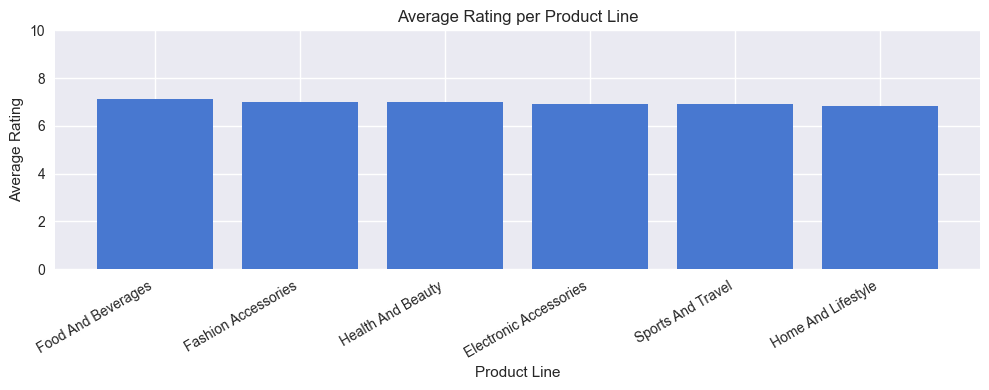

In [27]:
# Visualisasi 2: Average Rating per Product Line
if 'product_line' in df.columns and 'rating' in df.columns:
    grp = df.groupby('product_line')['rating'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,4))
    plt.bar(grp.index, grp.values)
    plt.title('Average Rating per Product Line')
    plt.xlabel('Product Line')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=30, ha='right')
    plt.ylim(0, 10)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom product_line atau rating tidak ditemukan.")

### 3. Bagaimana hubungan antara total transaksi dengan ratingnya?

### Insight
Menilai apakah transaksi bernilai tinggi cenderung memiliki rating lebih baik/lebih buruk.

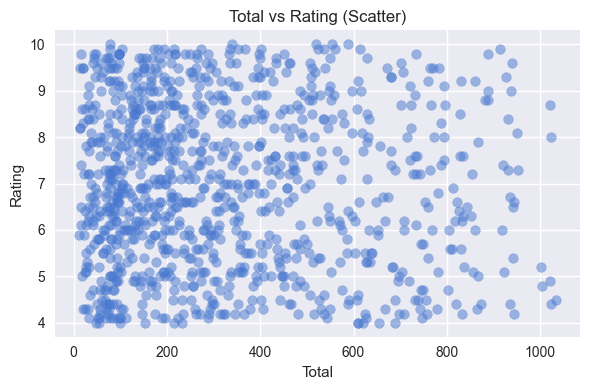

In [28]:
# Visualisasi 3: Scatter total vs rating
if 'total' in df.columns and 'rating' in df.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(df['total'], df['rating'], alpha=0.5)
    plt.title('Total vs Rating (Scatter)')
    plt.xlabel('Total')
    plt.ylabel('Rating')
    plt.tight_layout()
    plt.show()
else:
    print("Kolom total atau rating tidak ditemukan.")

### 4. Bagaimana metode pembayaran per tipe pelanggan?

### Insight
Memahami preferensi pembayaran setiap segmen (Member vs Normal) untuk strategi promosi/loyalty.

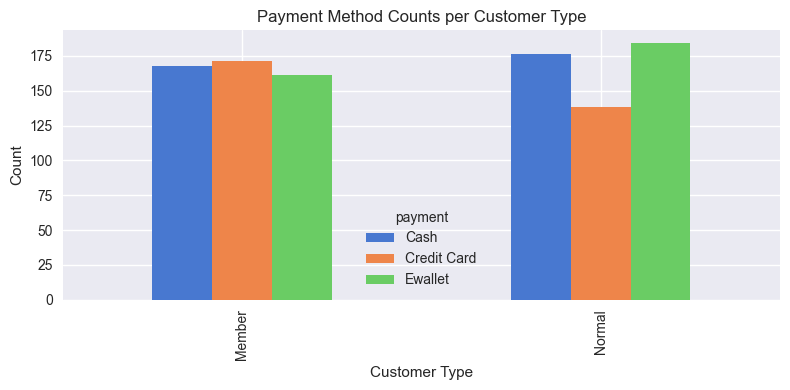

In [29]:
# Visualisasi 4: Payment method counts per customer type (grouped bar)
if 'payment' in df.columns and 'customer_type' in df.columns:
    ct = pd.crosstab(df['customer_type'], df['payment'])
    ct.plot(kind='bar', figsize=(8,4))
    plt.title('Payment Method Counts per Customer Type')
    plt.xlabel('Customer Type')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("Kolom payment atau customer_type tidak ditemukan.")

### 5. Bagaimana rata-rata dari total, rating, serta gross income nya?

--- total ---
Mean: 321.52786472945894
Median: 253.596
Std: 244.01771066912082
25%: 123.15712500000001
75%: 470.988


--- rating ---
Mean: 6.971342685370741
Median: 7.0
Std: 1.719392139329465
25%: 5.5
75%: 8.5


--- gross_income ---
Mean: 15.310850701402805
Median: 12.076
Std: 11.61989098424386
25%: 5.864625
75%: 22.428




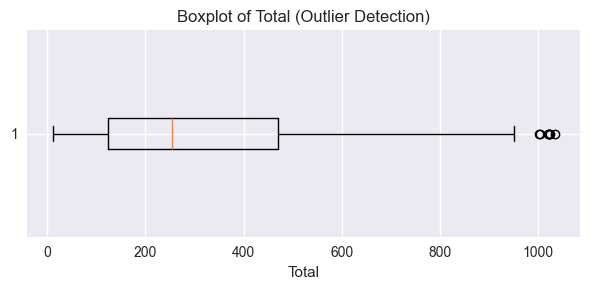

In [30]:
# Descriptive stats
metrics = ['total','rating','gross_income']
for m in metrics:
    if m in df.columns:
        print(f"--- {m} ---")
        print("Mean:", df[m].mean())
        print("Median:", df[m].median())
        print("Std:", df[m].std())
        print("25%:", df[m].quantile(0.25))
        print("75%:", df[m].quantile(0.75))
        print("\n")

# Boxplot for outlier analysis (total)
if 'total' in df.columns:
    plt.figure(figsize=(6,3))
    plt.boxplot(df['total'].dropna(), vert=False)
    plt.title('Boxplot of Total (Outlier Detection)')
    plt.xlabel('Total')
    plt.tight_layout()
    plt.show()

### 6. Apakah rata-rata total berbeda signifikan antara dua cabang (mis. A vs B).

**Contoh uji:** Two-sample t-test (Welch) untuk menguji apakah rata-rata `total` berbeda signifikan antara dua cabang (mis. A vs B).
- H0: rata-rata total cabang A = rata-rata total cabang B
- H1: berbeda
- Gunakan alpha = 0.05

In [34]:
if 'Branch' in df.columns and 'Total' in df.columns:
    branches = sorted(df['Branch'].unique())
    if len(branches) >= 2:
        b1, b2 = branches[0], branches[1]
        g1 = df[df['Branch'] == b1]['Total'].dropna()
        g2 = df[df['Branch'] == b2]['Total'].dropna()
        tstat, pval = stats.ttest_ind(g1, g2, equal_var=False)
        print(f"Comparing branches: {b1} vs {b2}")
        print(f"n1={len(g1)}, n2={len(g2)}")
        print(f"t-statistic = {tstat:.4f}, p-value = {pval:.6f}")
        if pval < 0.05:
            print("Hasil: p < 0.05 → Tolak H₀ (ada perbedaan signifikan).")
        else:
            print("Hasil: p ≥ 0.05 → Gagal tolak H₀ (tidak ada bukti perbedaan).")

Comparing branches: A vs B
n1=340, n2=332
t-statistic = -0.4109, p-value = 0.681307
Hasil: p ≥ 0.05 → Gagal tolak H₀ (tidak ada bukti perbedaan).


# Conclusion
- Pada uji inferensial menunjukkan perbedaan signifikan antar cabang, gunakan hasil tersebut untuk menargetkan cabang yang performanya rendah.
- Rekomendasi tindakan:
  - Fokus promosi pada top product lines per cabang.
  - Training layanan di jam sibuk yang teridentifikasi.
  - Monitor KPI (monthly) untuk mengevaluasi pencapaian +10% revenue & rating ≥8.0.